<a href="https://colab.research.google.com/github/Itskindastrange/Magic-UCI-Dataset-ML/blob/main/Magic_UCI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [4]:
!unzip -j /content/magic+gamma+telescope.zip


Archive:  /content/magic+gamma+telescope.zip
  inflating: magic04.data            
  inflating: magic04.names           


In [5]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)

In [6]:
df.head(2)

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
0  28.7967  16.0021  2.6449  0.3918  0.1982  27.7004  22.0110   -8.2027   
1  31.6036  11.7235  2.5185  0.5303  0.3773  26.2722  23.8238   -9.9574   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g

In [7]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [8]:
df['class']=(df['class']=='g').astype(int)

In [9]:
df.head(10)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
7   26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
8   96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
9   46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  
5   3.6130  238.0980      1  
6   4.7920  219.0870      1  
7   0.8120  237.1340      1  
8   4.8540  248.2260      1  
9   7.8750  102.2510      1

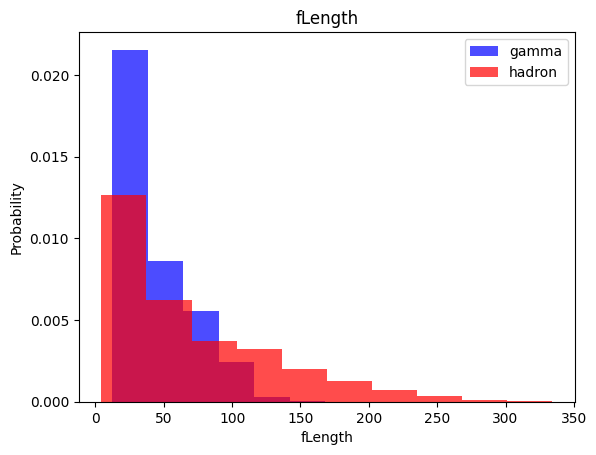

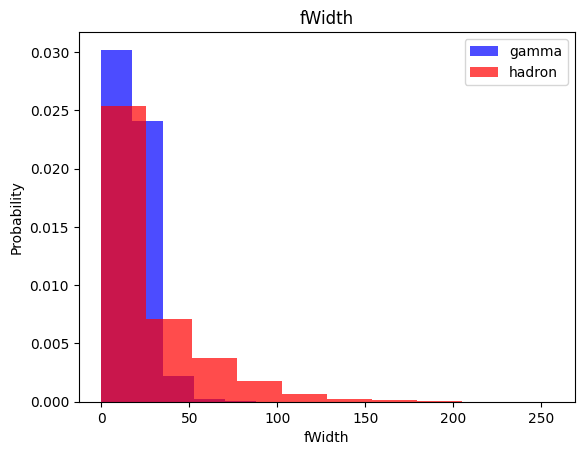

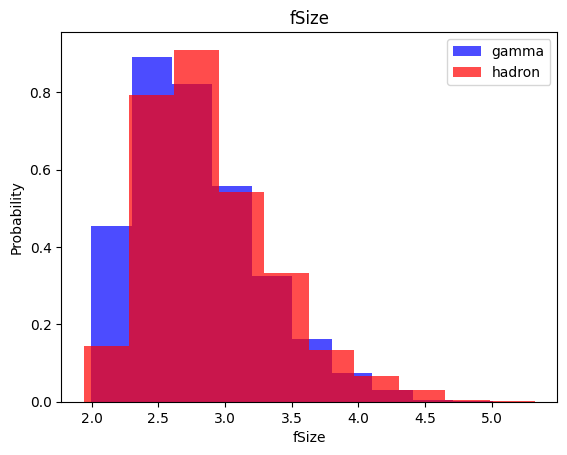

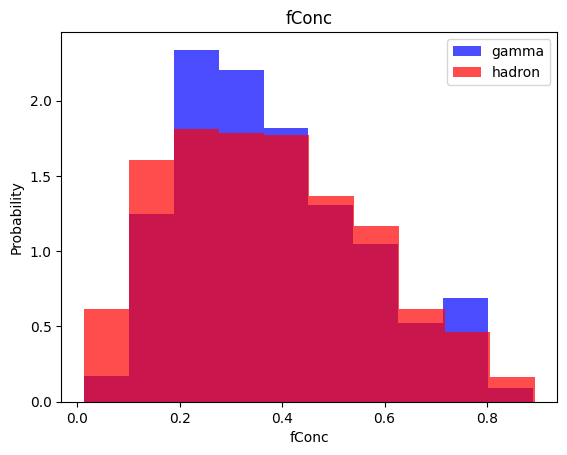

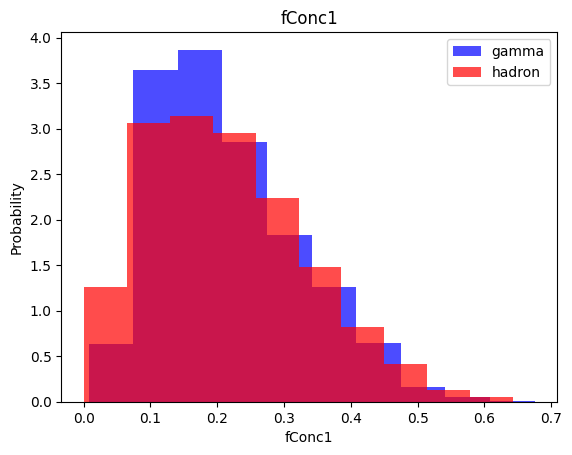

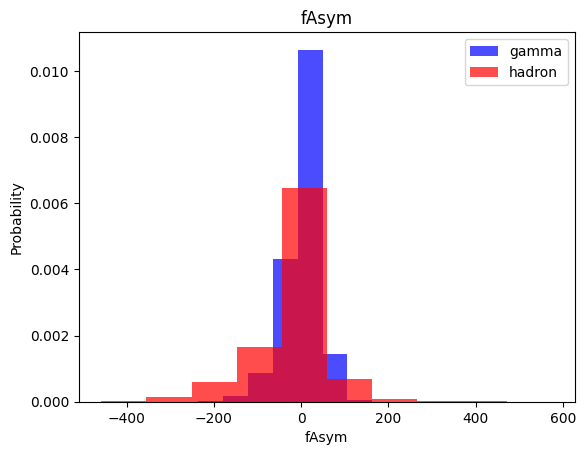

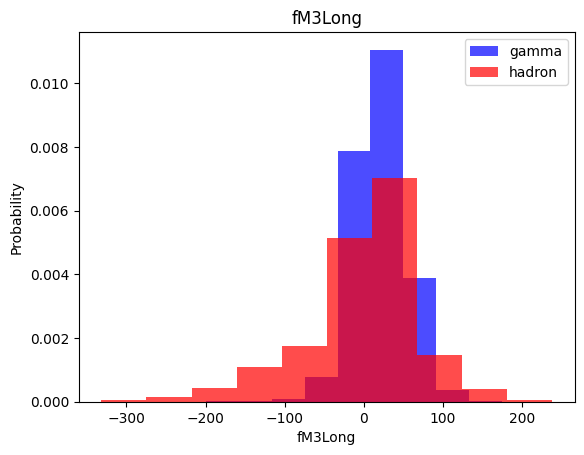

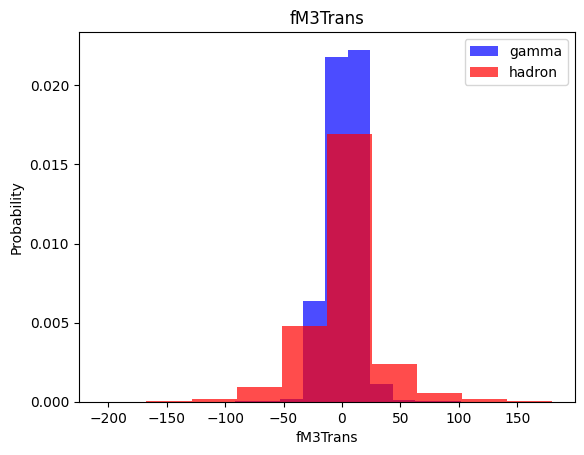

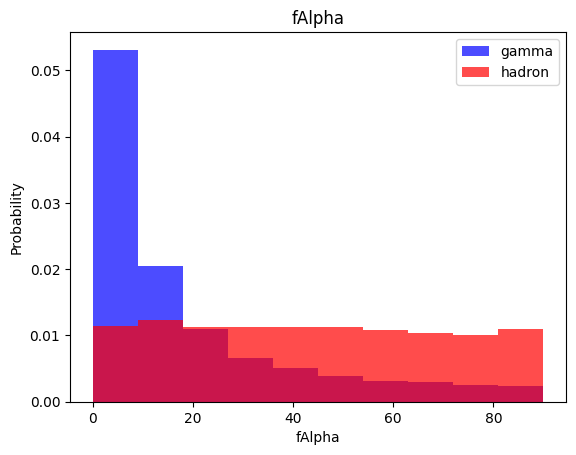

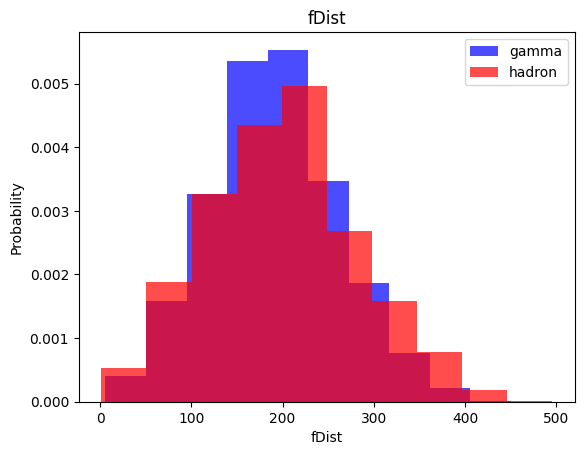

In [10]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train,Test,Validation Datasets

In [11]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [12]:
#*as we see the num of gamma and hafron are not kind of same so we oversample the data to make the vals kind of same*

def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  #X=scaler.transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(len(y),1))))

  return data,X,y

In [13]:
train.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
15519  23.5084  10.3693  2.3372  0.6478  0.4636  14.2529  -0.4142  -10.8507   
66     20.9491   7.0366  2.1414  0.7292  0.3935 -22.9802 -12.1656    6.0883   
7512   50.3517  12.7905  2.7720  0.3804  0.2274 -28.1604 -37.6189    8.0301   
2454   18.2998  12.5051  2.4676  0.6576  0.3663   8.8926 -15.8476    2.1252   
16336  80.3573  46.7521  3.9682  0.1023  0.0395  26.4913  92.2686   42.4604   

        fAlpha     fDist  class  
15519  56.8778  154.6088      0  
66     40.6560  146.5120      1  
7512    9.6757  179.1220      1  
2454   73.6580  189.5980      1  
16336  72.1289  122.6955      0

In [14]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7366
4046


In [15]:
valid.head()

fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
7943   40.8309  17.2319  3.0154  0.2510  0.1337  -42.7736 -17.5628    9.6436   
11501  22.3488  12.8311  2.2553  0.5833  0.3472   11.6407  14.4753    8.7341   
14986  29.5116  14.5846  2.5259  0.5114  0.2365   14.8457  21.0673    3.9078   
4667   68.9277  17.4968  2.8004  0.2787  0.1465  -60.5299  20.0711  -11.4620   
10339  87.0503  21.4098  2.9696  0.2263  0.1432 -115.1690  48.2902   15.9265   

        fAlpha     fDist  class  
7943    0.5730  167.2160      1  
11501  58.0190  105.4790      1  
14986  80.8572  116.6055      0  
4667    4.3870  267.3660      1  
10339   1.4973  214.7950      1

In [16]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

In [17]:
sum(y_train==1)


7366

In [18]:
sum(y_train==0)

7366

# **Models**

**KNN**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred=knn_model.predict(X_test)

In [22]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [23]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1310
           1       0.87      0.86      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



**Naive Bayes**

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [27]:
y_pred=nb_model.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1310
           1       0.74      0.90      0.81      2494

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



**Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [31]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1310
           1       0.85      0.82      0.84      2494

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



**SVM**

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [34]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1310
           1       0.90      0.90      0.90      2494

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



# **NN**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [37]:
def train_model(X_train,y_train,num_nodes,dropouot_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropouot_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropouot_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
      ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])

  history=nn_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )

  return nn_model,history

num_nodes:16,dropout_prob:0,lr:0.01,batch_size:32


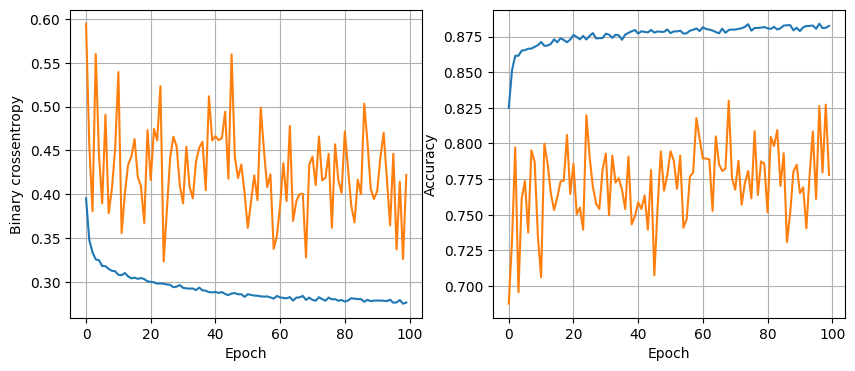

119/119 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8725
num_nodes:16,dropout_prob:0,lr:0.01,batch_size:64


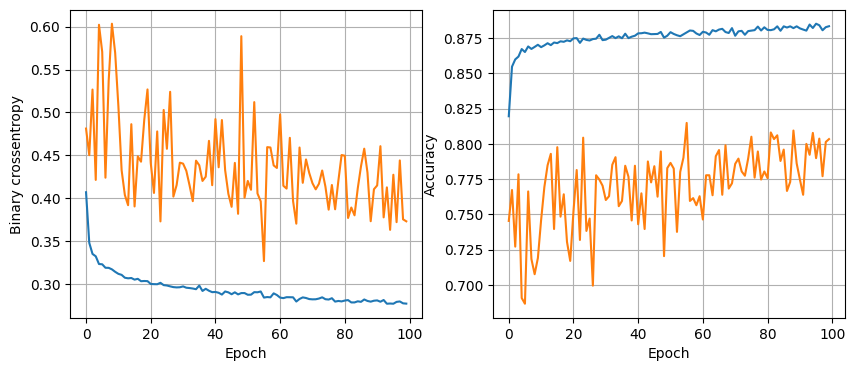

119/119 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8757
num_nodes:16,dropout_prob:0,lr:0.01,batch_size:128


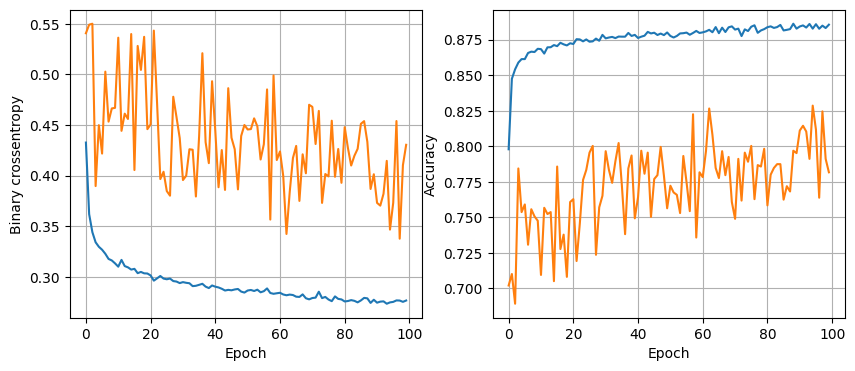

119/119 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8738
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:32


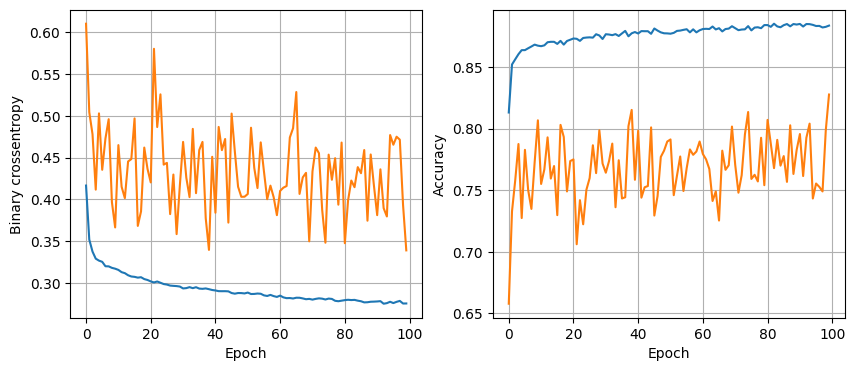

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8649
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:64


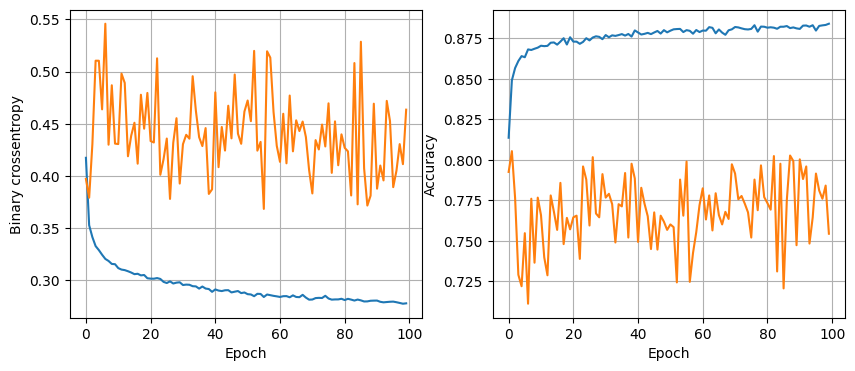

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8793
num_nodes:16,dropout_prob:0,lr:0.005,batch_size:128


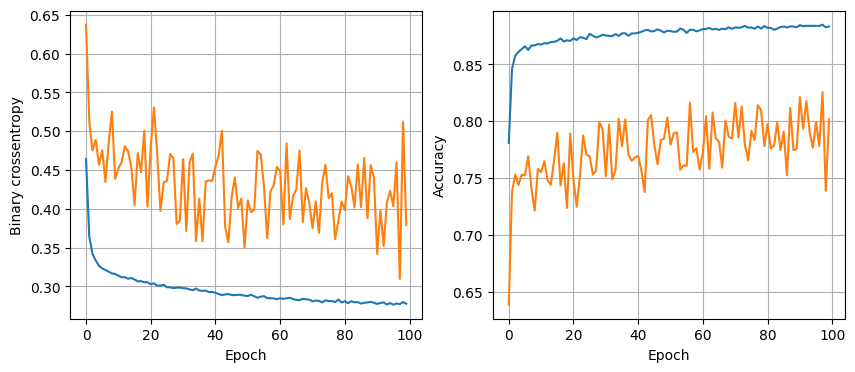

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8709
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:32


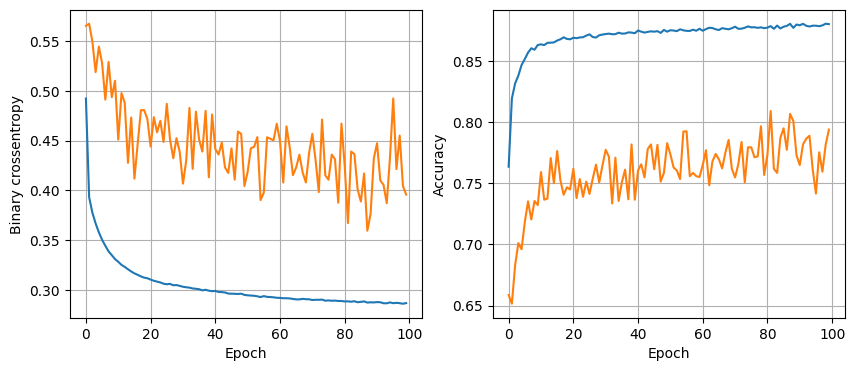

119/119 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8691
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:64


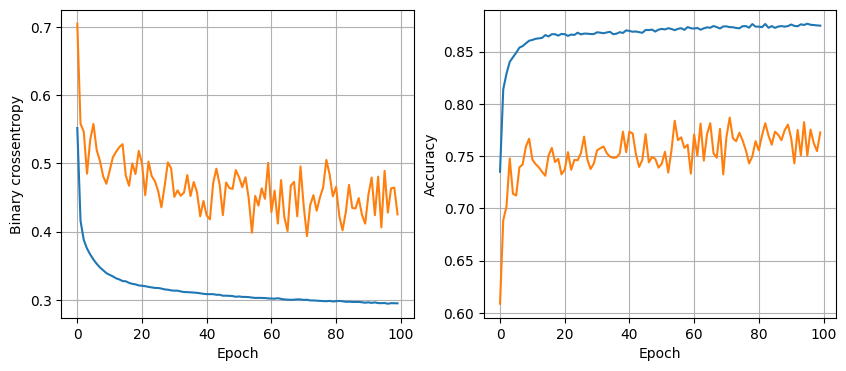

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8762
num_nodes:16,dropout_prob:0,lr:0.001,batch_size:128


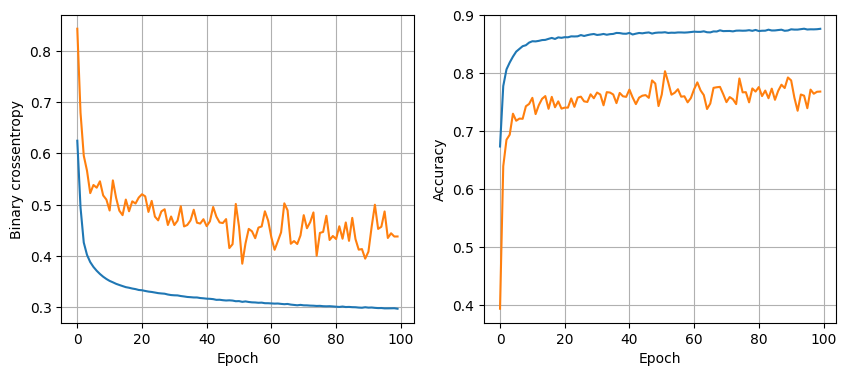

119/119 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.8730
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:32


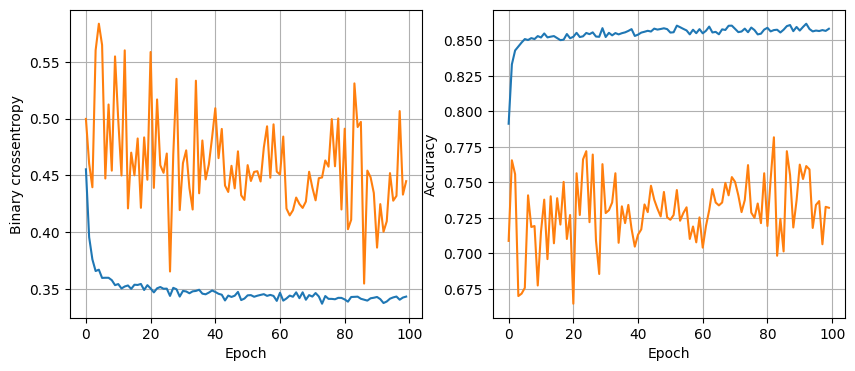

119/119 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8736
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:64


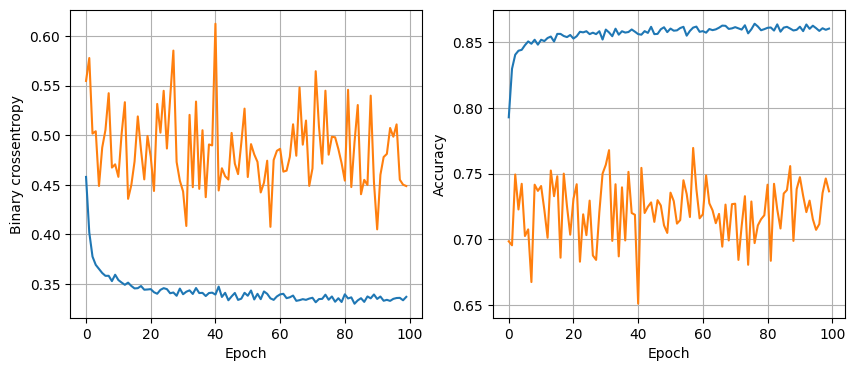

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8715
num_nodes:16,dropout_prob:0.2,lr:0.01,batch_size:128


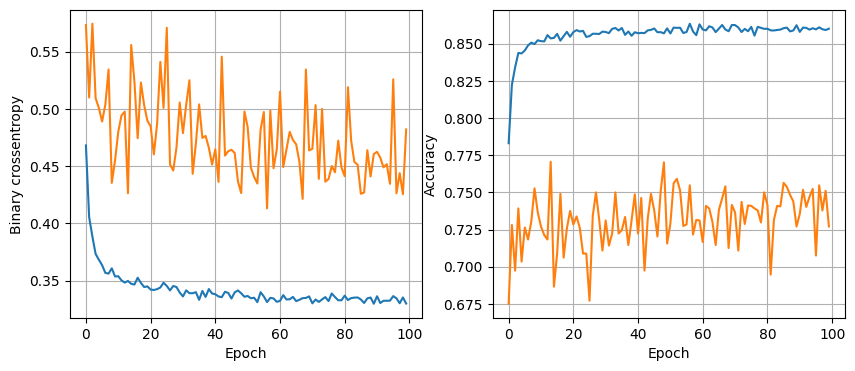

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8675
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:32


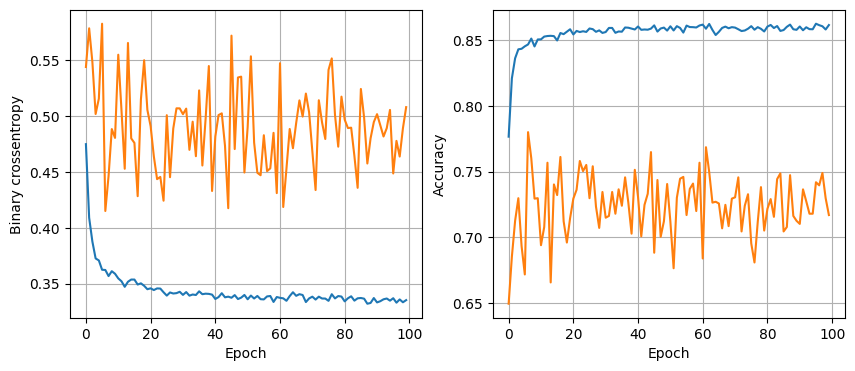

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8657
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:64


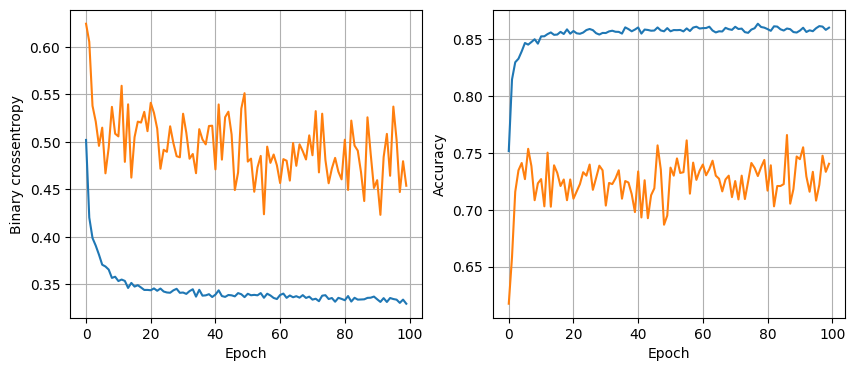

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8738
num_nodes:16,dropout_prob:0.2,lr:0.005,batch_size:128


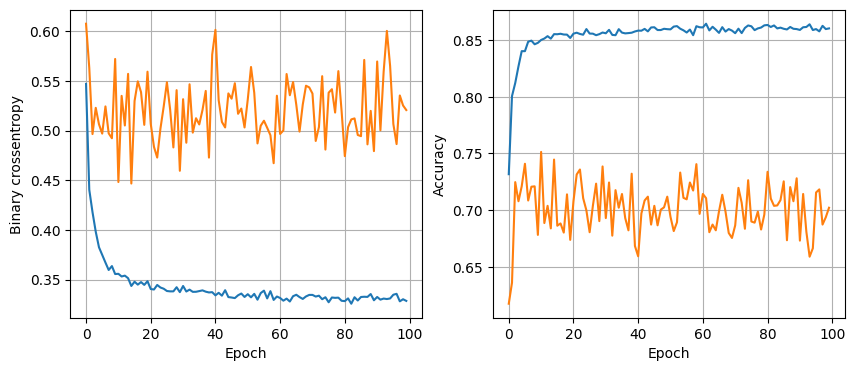

119/119 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8704
num_nodes:16,dropout_prob:0.2,lr:0.001,batch_size:32


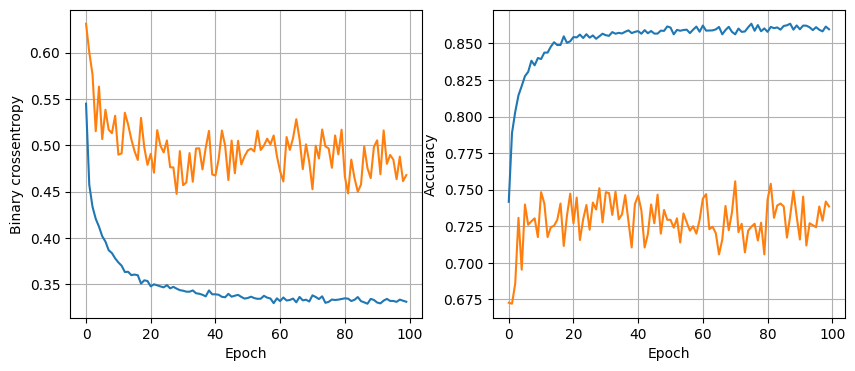

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8701
num_nodes:16,dropout_prob:0.2,lr:0.001,batch_size:64


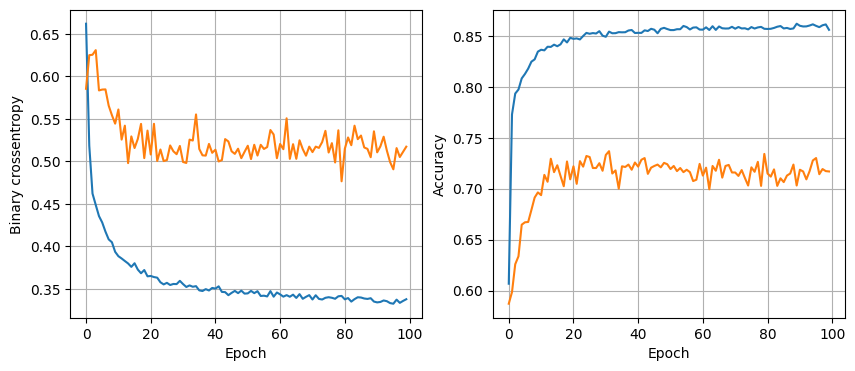

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8730
num_nodes:16,dropout_prob:0.2,lr:0.001,batch_size:128


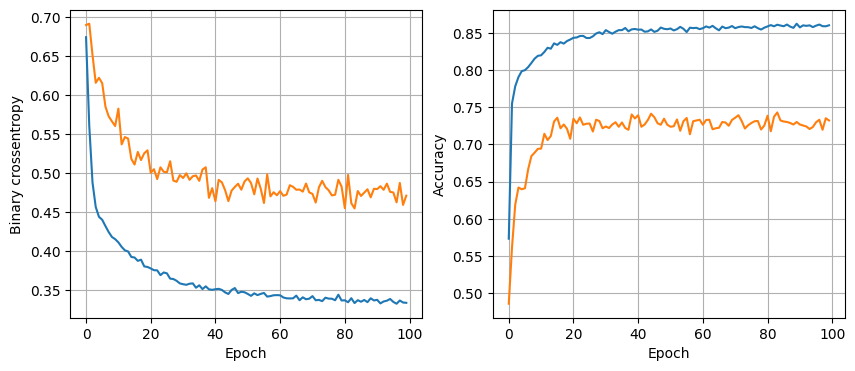

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8712
num_nodes:32,dropout_prob:0,lr:0.01,batch_size:32


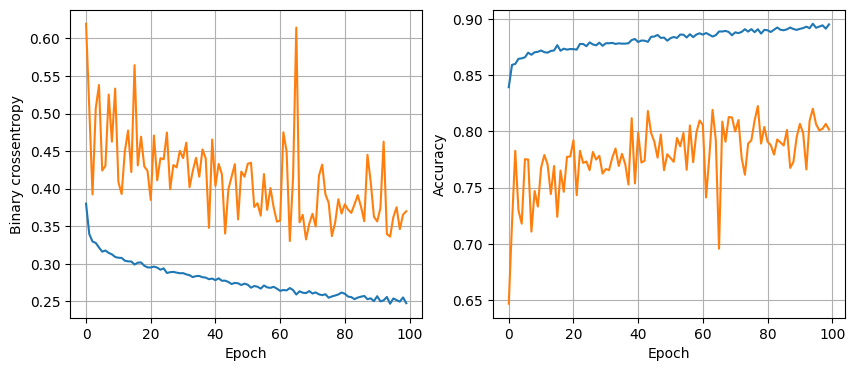

119/119 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8612
num_nodes:32,dropout_prob:0,lr:0.01,batch_size:64


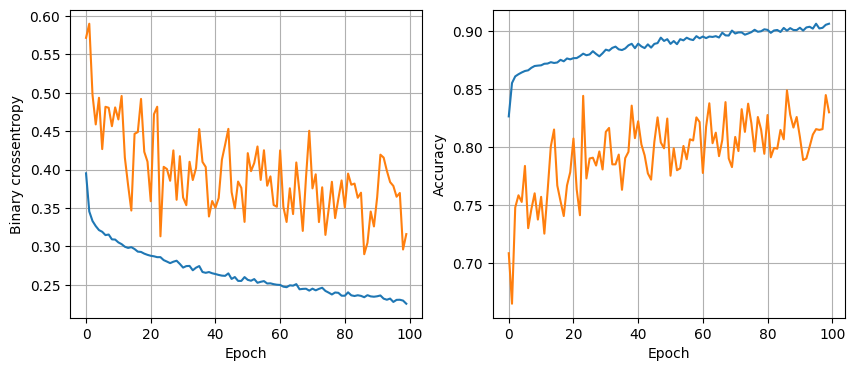

119/119 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8707
num_nodes:32,dropout_prob:0,lr:0.01,batch_size:128


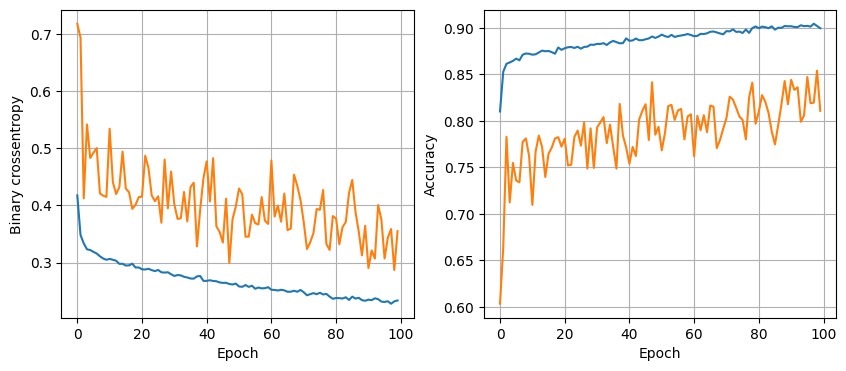

119/119 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8733
num_nodes:32,dropout_prob:0,lr:0.005,batch_size:32


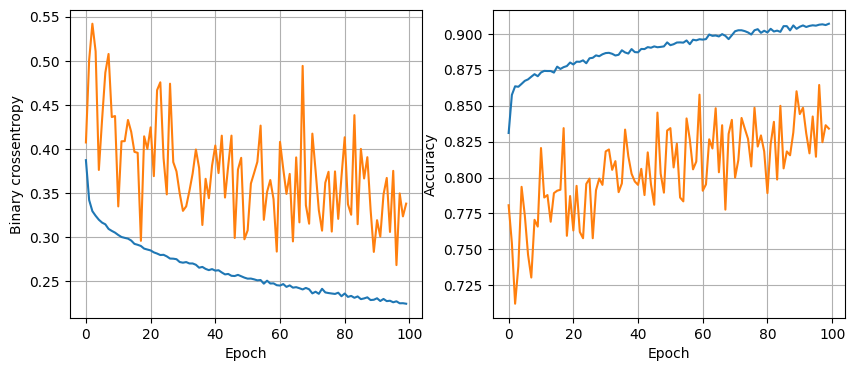

119/119 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8738
num_nodes:32,dropout_prob:0,lr:0.005,batch_size:64


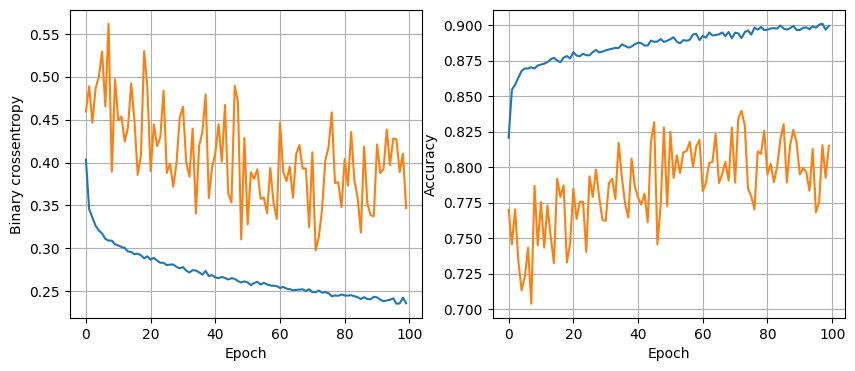

119/119 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8730
num_nodes:32,dropout_prob:0,lr:0.005,batch_size:128


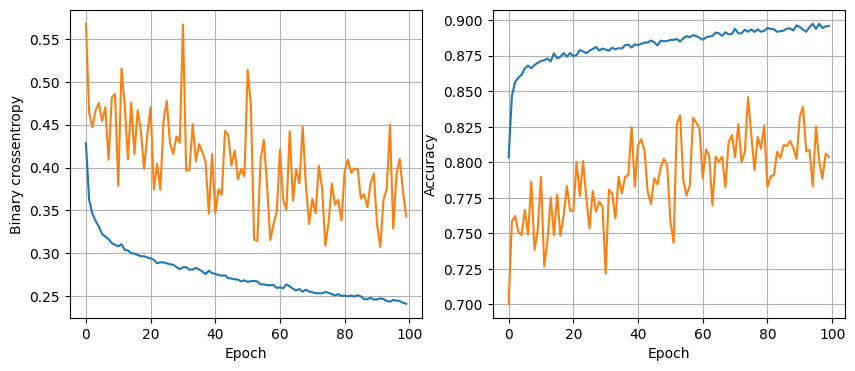

119/119 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8767
num_nodes:32,dropout_prob:0,lr:0.001,batch_size:32


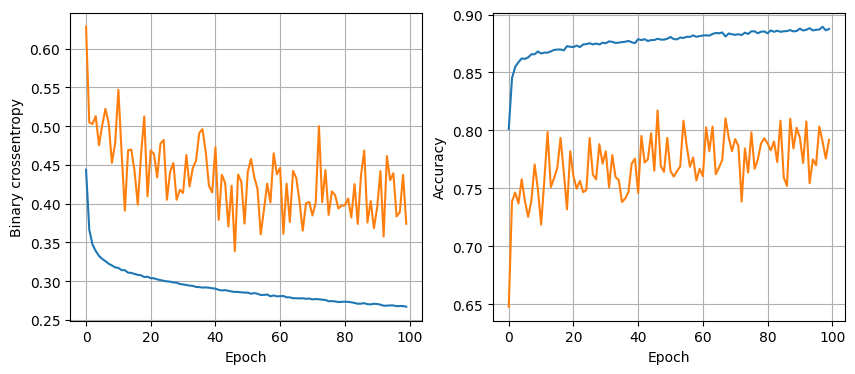

119/119 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8793
num_nodes:32,dropout_prob:0,lr:0.001,batch_size:64


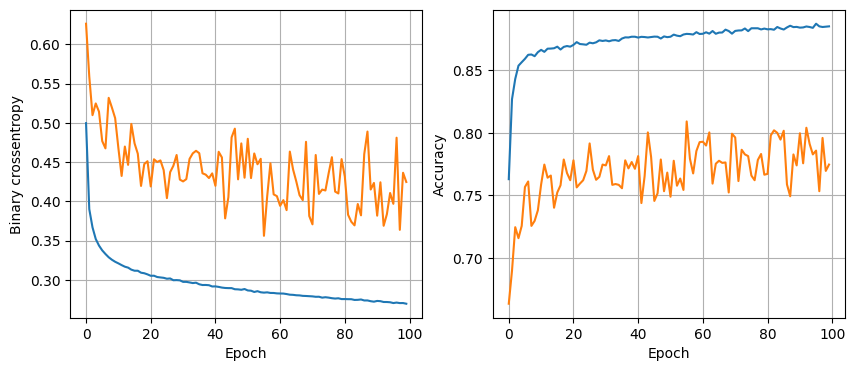

119/119 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8785
num_nodes:32,dropout_prob:0,lr:0.001,batch_size:128


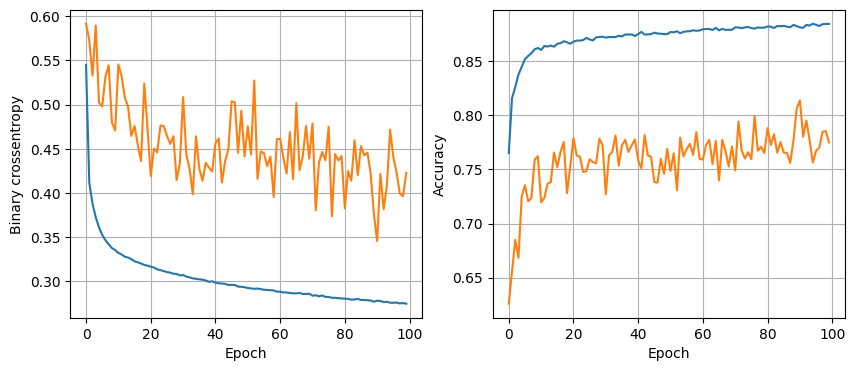

119/119 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8780
num_nodes:32,dropout_prob:0.2,lr:0.01,batch_size:32


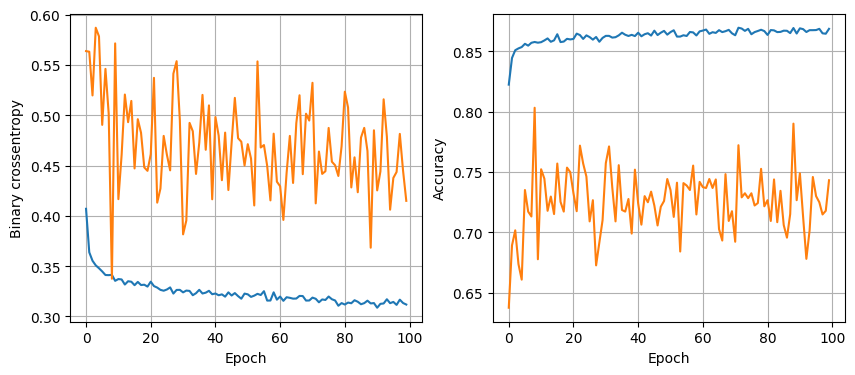

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8762
num_nodes:32,dropout_prob:0.2,lr:0.01,batch_size:64


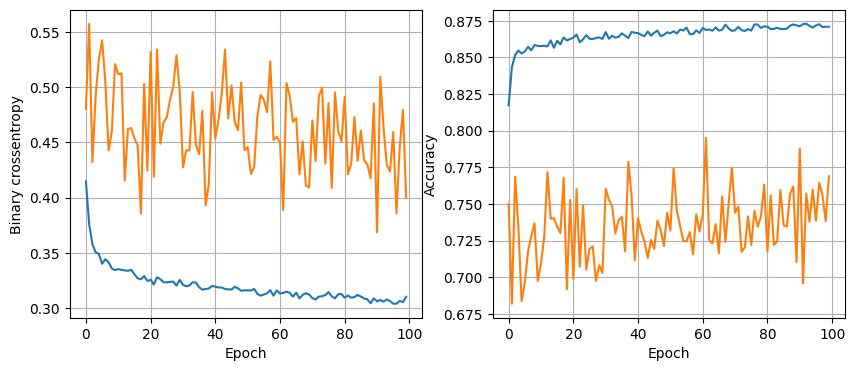

119/119 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8770
num_nodes:32,dropout_prob:0.2,lr:0.01,batch_size:128


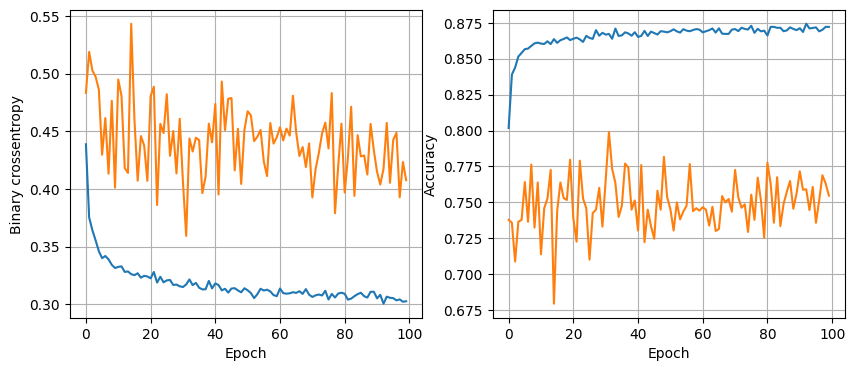

119/119 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8759
num_nodes:32,dropout_prob:0.2,lr:0.005,batch_size:32


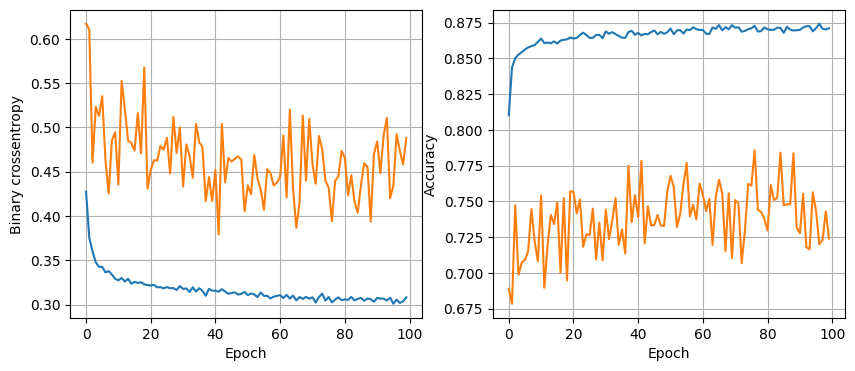

119/119 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8772
num_nodes:32,dropout_prob:0.2,lr:0.005,batch_size:64


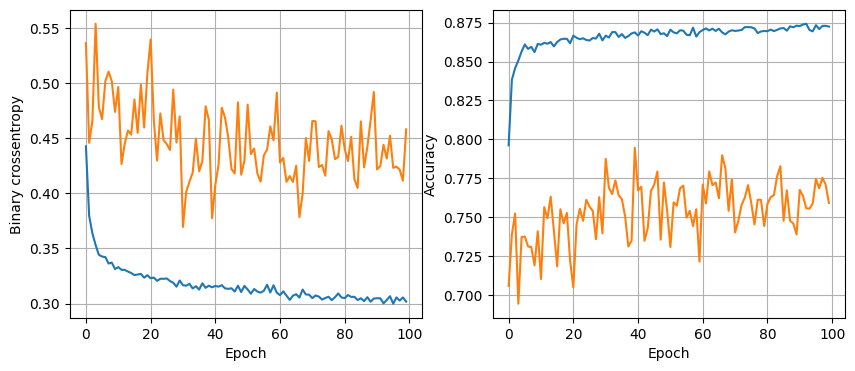

119/119 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8759
num_nodes:32,dropout_prob:0.2,lr:0.005,batch_size:128


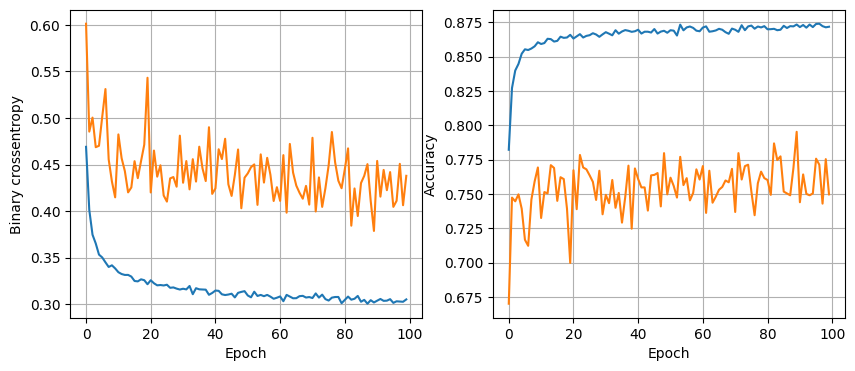

119/119 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.8783
num_nodes:32,dropout_prob:0.2,lr:0.001,batch_size:32


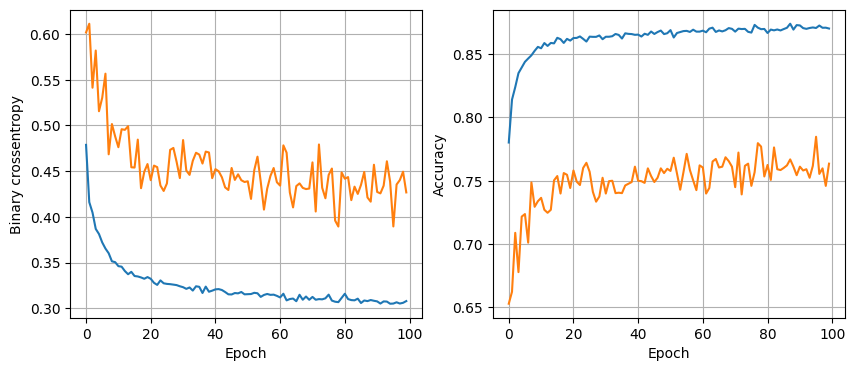

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8701
num_nodes:32,dropout_prob:0.2,lr:0.001,batch_size:64


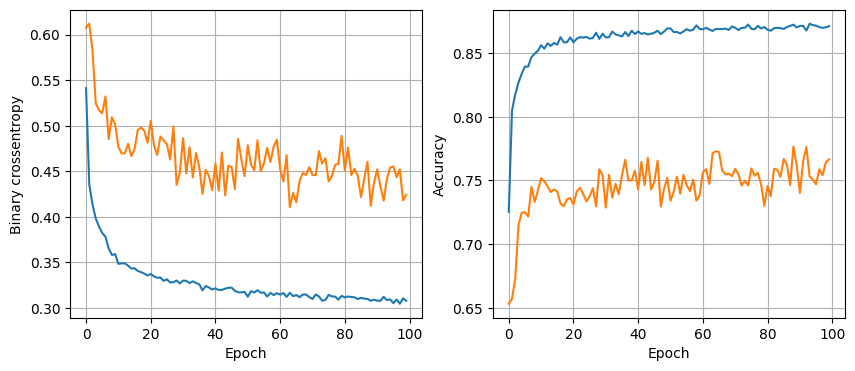

119/119 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8770
num_nodes:32,dropout_prob:0.2,lr:0.001,batch_size:128


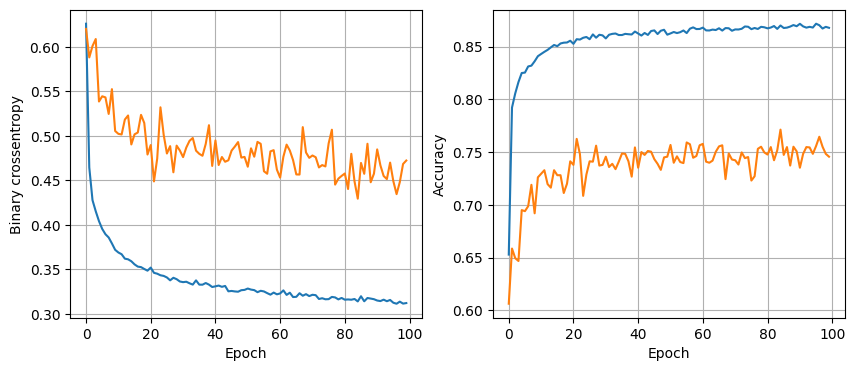

119/119 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.8757
num_nodes:64,dropout_prob:0,lr:0.01,batch_size:32


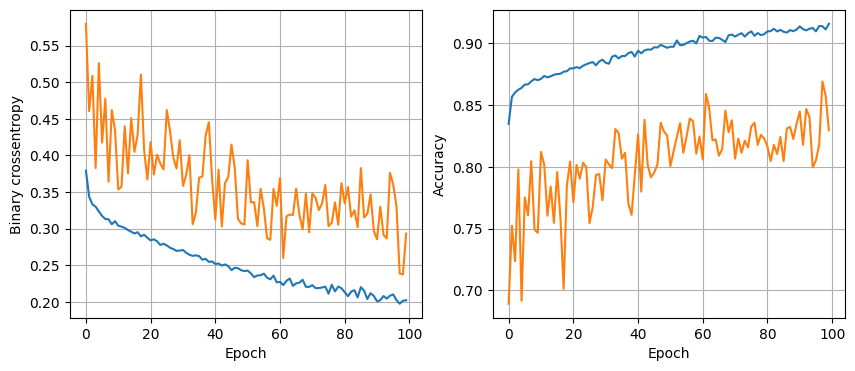

119/119 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.8662
num_nodes:64,dropout_prob:0,lr:0.01,batch_size:64


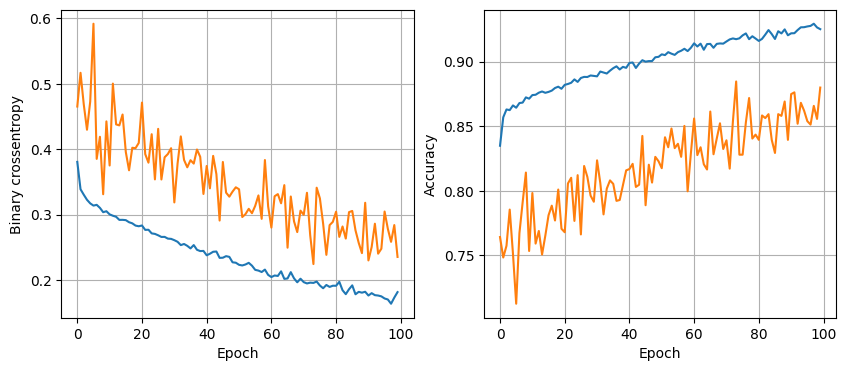

119/119 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.8651
num_nodes:64,dropout_prob:0,lr:0.01,batch_size:128


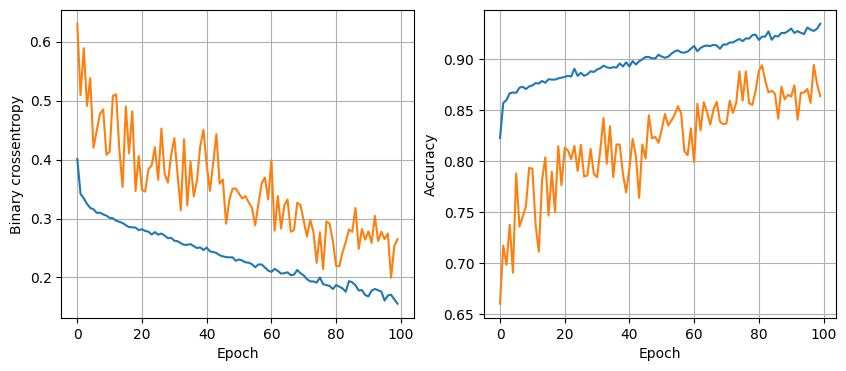

119/119 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8659
num_nodes:64,dropout_prob:0,lr:0.005,batch_size:32


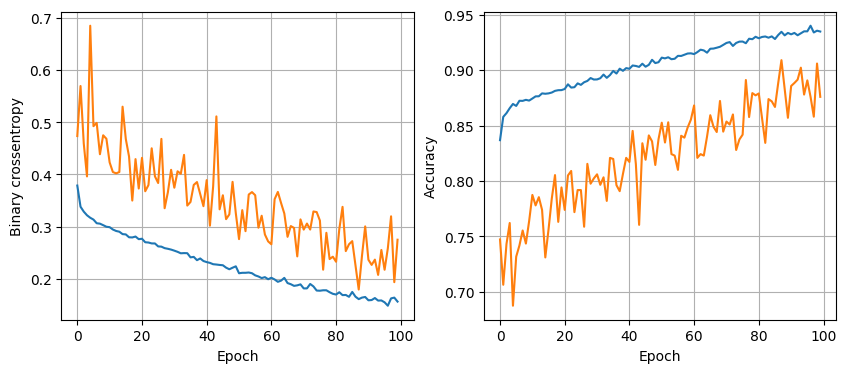

119/119 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8659
num_nodes:64,dropout_prob:0,lr:0.005,batch_size:64


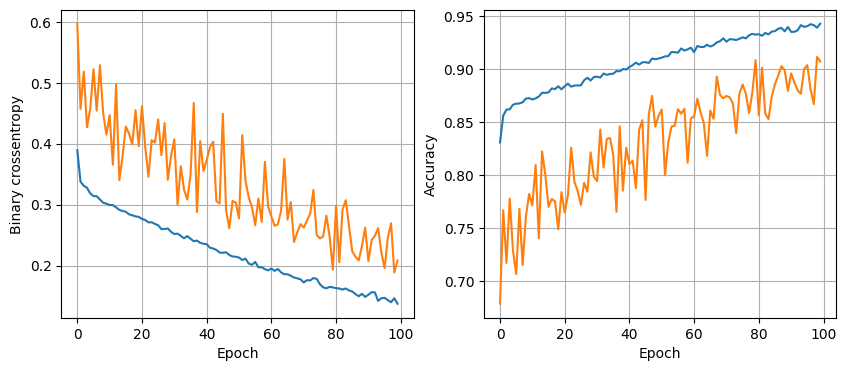

119/119 [==============================] - 0s 3ms/step - loss: 0.5103 - accuracy: 0.8588
num_nodes:64,dropout_prob:0,lr:0.005,batch_size:128


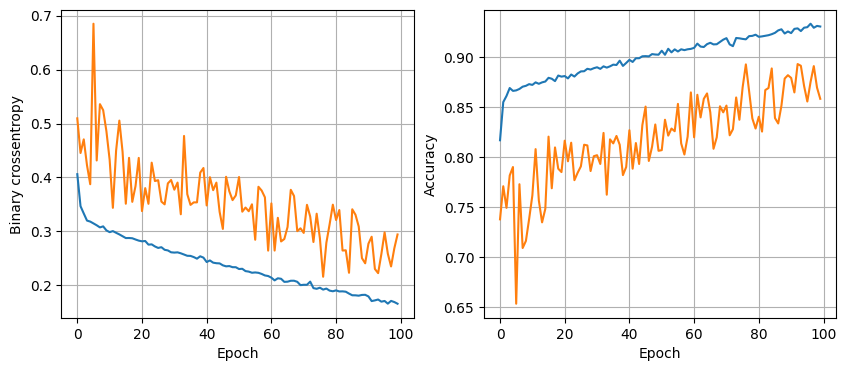

119/119 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8654
num_nodes:64,dropout_prob:0,lr:0.001,batch_size:32


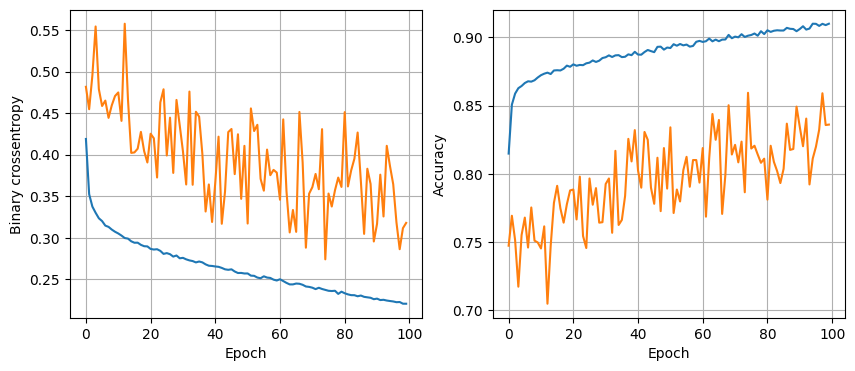

119/119 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8686
num_nodes:64,dropout_prob:0,lr:0.001,batch_size:64


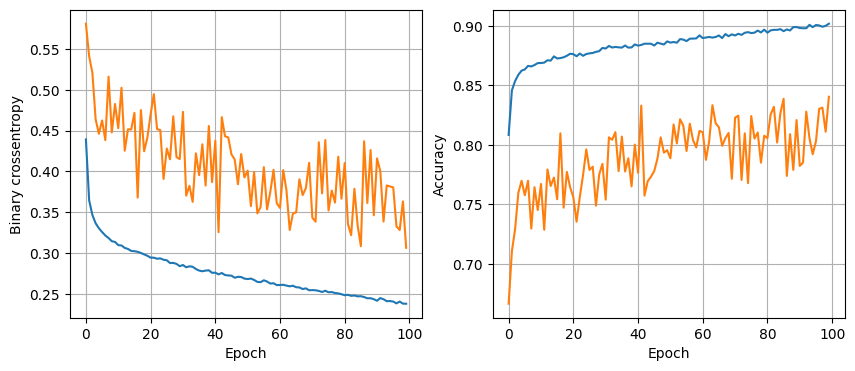

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8783
num_nodes:64,dropout_prob:0,lr:0.001,batch_size:128


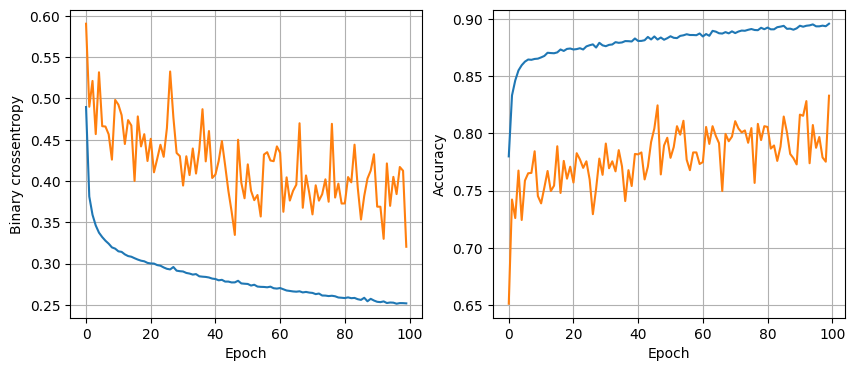

119/119 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8764
num_nodes:64,dropout_prob:0.2,lr:0.01,batch_size:32


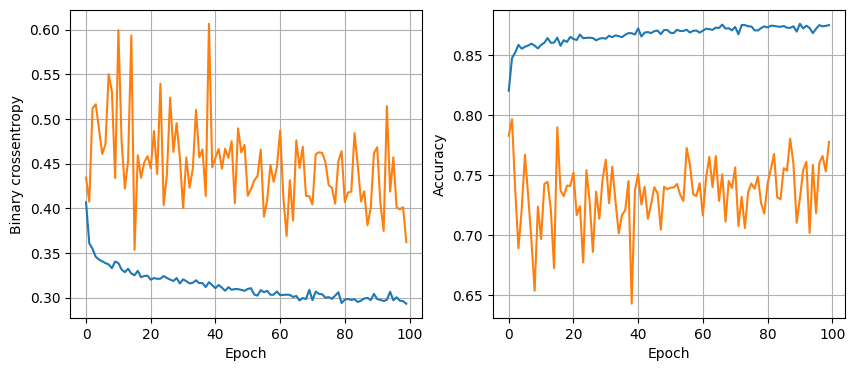

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8741
num_nodes:64,dropout_prob:0.2,lr:0.01,batch_size:64


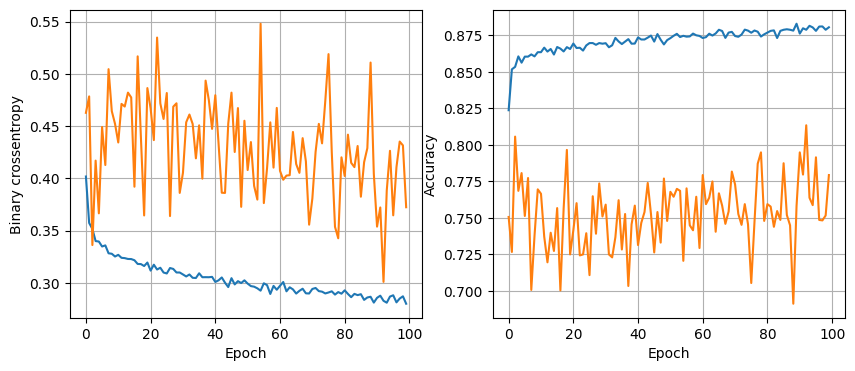

119/119 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8801
num_nodes:64,dropout_prob:0.2,lr:0.01,batch_size:128


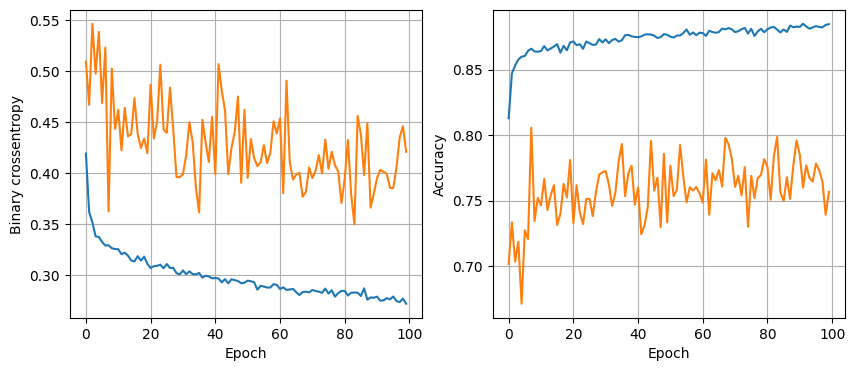

119/119 [==============================] - 0s 3ms/step - loss: 0.3017 - accuracy: 0.8749
num_nodes:64,dropout_prob:0.2,lr:0.005,batch_size:32


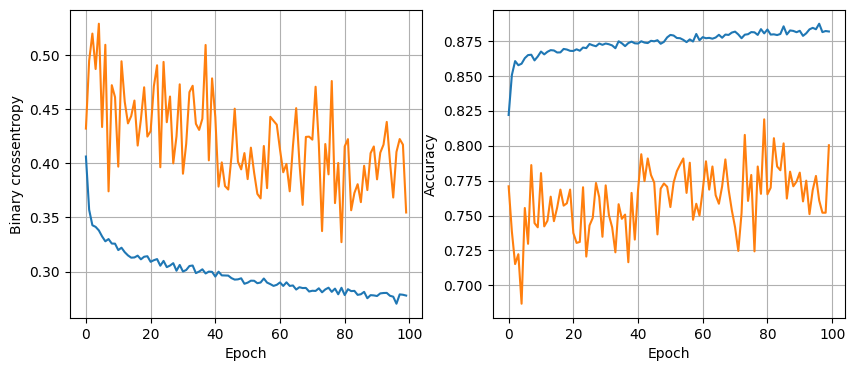

119/119 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8767
num_nodes:64,dropout_prob:0.2,lr:0.005,batch_size:64


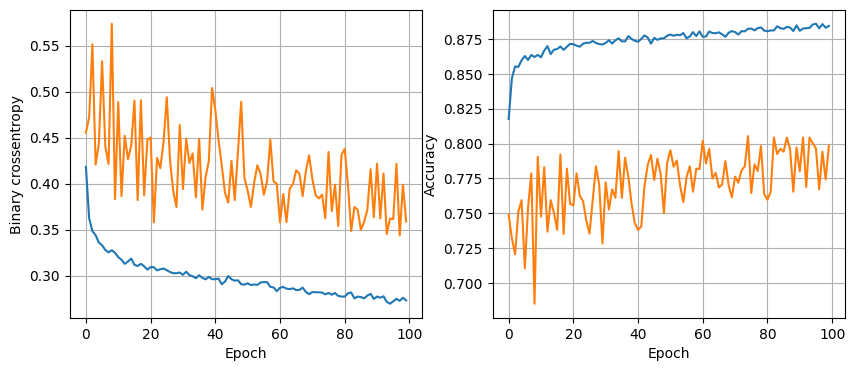

119/119 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8807
num_nodes:64,dropout_prob:0.2,lr:0.005,batch_size:128


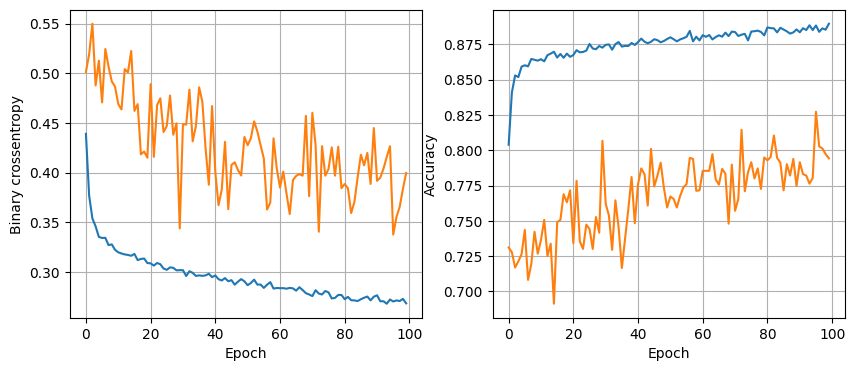

119/119 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8875
num_nodes:64,dropout_prob:0.2,lr:0.001,batch_size:32


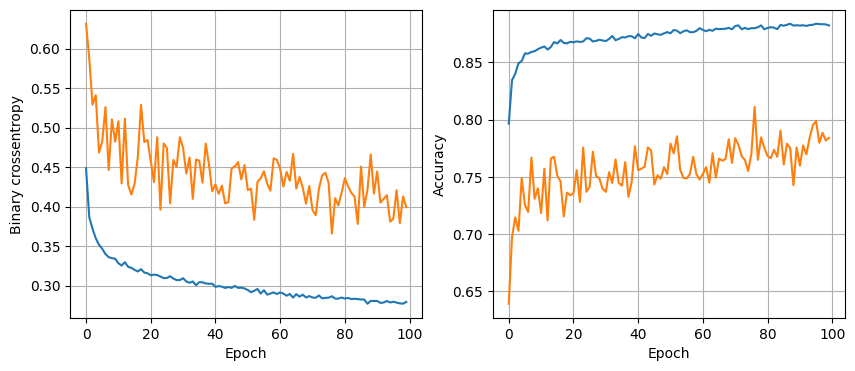

119/119 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8817
num_nodes:64,dropout_prob:0.2,lr:0.001,batch_size:64


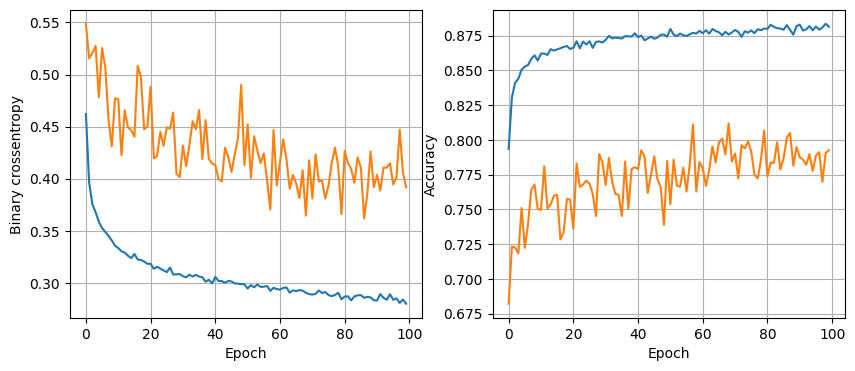

119/119 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8793
num_nodes:64,dropout_prob:0.2,lr:0.001,batch_size:128


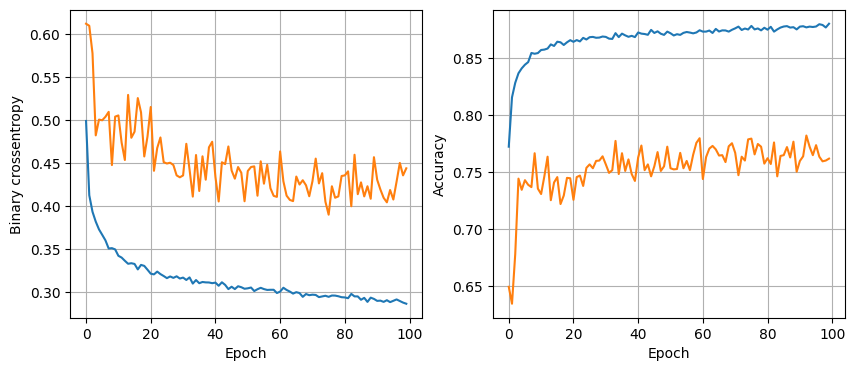

119/119 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8796


In [80]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100

for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f'num_nodes:{num_nodes},dropout_prob:{dropout_prob},lr:{lr},batch_size:{batch_size}')
        model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(X_valid,y_valid)[0]
        #print(f'val_loss:{val_loss}')
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [84]:

least_loss_model.save('/content/best_model.h5')
#least_loss_model.save(least_loss_model.keras)


In [39]:
least_loss_model=tf.keras.models.load_model('/content/best_model.h5')
y_pred=least_loss_model.predict(X_test)

119/119 [==============================] - 0s 1ms/step


In [41]:
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [42]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1310
           1       0.87      0.96      0.91      2494

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

